In [1]:
import numpy as np
import matplotlib.pyplot as plt

import getdist
from getdist import plots
import copy
from anesthetic import NestedSamples

%matplotlib inline

### Polychord has a nice output module

In [2]:
%run -i "~/lib/PolyChordLite/pypolychord/output.py"

In [4]:
output = PolyChordOutput("sampler/output/", "vanilla")

### Define the parameters

In [5]:
def get_post(out, pars):
    out.make_paramnames_files(pars)
    return out.posterior

p_lya = [('ap', r'\alpha_{||}')]
p_lya += [('at', r'\alpha_\bot')]
p_lya += [('bias_eta_lya', r'b_{\eta Ly\alpha}')]
p_lya += [('beta_lya', r'\beta_{Ly\alpha}')]
p_lya += [('bias_hcd', r'b_{HCD}')]
p_lya += [('beta_hcd', r'\beta_{HCD}')]

posterior = get_post(output, p_lya)

sampler/output/vanilla.txt
Removed no burn in


### Plot the posteriors

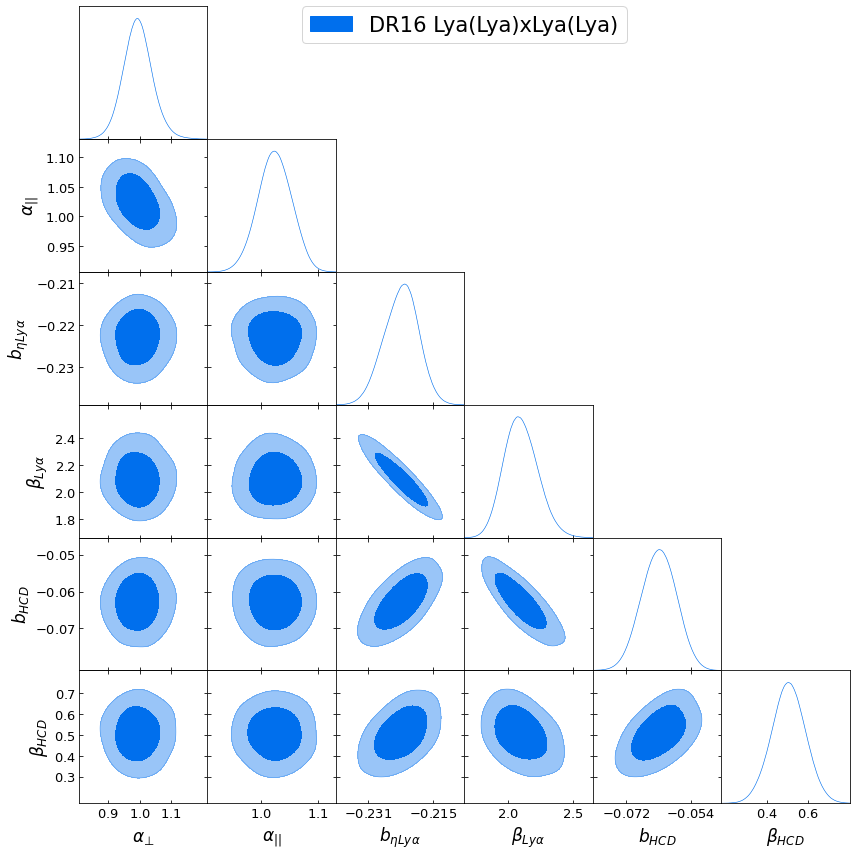

In [6]:
g = getdist.plots.getSubplotPlotter(width_inch=12)
g.settings.fontsize = 16
g.settings.legend_fontsize = 24
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20

g.triangle_plot([posterior], ['at','ap','bias_eta_lya', 'beta_lya', 'bias_hcd', 'beta_hcd'], filled=True,
                   legend_labels=[r'DR16 Lya(Lya)xLya(Lya)'])

plt.savefig("dr16_contour_plot.pdf")

### Use anesthetic to get chain statistics

In [8]:
nested = NestedSamples(root="sampler/output/vanilla")
ns_output = nested.ns_output()

The evidence, KL divergence and Bayesian model dimensionality, with their corresponding errors, are:

In [9]:
for x in ns_output:
    print('%10s = %9.2f +/- %4.2f' % (x, ns_output[x].mean(), ns_output[x].std()))

      logZ =  15262.36 +/- 0.30
         D =     17.47 +/- 0.28
         d =      6.71 +/- 0.35
